In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

import matplotlib.pyplot as plt
from matplotlib.pyplot import (figure, title, subplot, plot, hist, show)
from scipy.linalg import svd
import seaborn as sns

import warnings

warnings.filterwarnings('ignore')

### Importing and visualizing the dataset

In [2]:
file_path = 'C:/Users/saras/OneDrive/Desktop/DTU/IntroML/Report1/Dataset/wpbc.data'
headers_path ='C:/Users/saras/OneDrive/Desktop/DTU/IntroML/Report1/Dataset/wpbc.names'

In [3]:
#Loading the data and the headers
wpbc_data = pd.read_csv(file_path, delimiter=',', header=None)
wpbc_headers = pd.read_csv(headers_path, header=None).iloc[:,0].transpose()

In [4]:
wpbc_data.columns = wpbc_headers

In [5]:
wpbc_data

,id_number,outcome,time,radius1,texture1,perimeter1,area1,smoothness1,compactness1,concavity1,...,perimeter3,area3,smoothness3,compactness3,concavity3,concave_points3,symmetry3,fractal_dimension3,tumor_size,lymph_node_status
0,119513,N,31,18.02,27.60,117.50,1013.0,0.09489,0.10360,0.10860,...,139.70,1436.0,0.11950,0.1926,0.3140,0.11700,0.2677,0.08113,5.0,5
1,8423,N,61,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,...,184.60,2019.0,0.16220,0.6656,0.7119,0.26540,0.4601,0.11890,3.0,2
2,842517,N,116,21.37,17.44,137.50,1373.0,0.08836,0.11890,0.12550,...,159.10,1949.0,0.11880,0.3449,0.3414,0.20320,0.4334,0.09067,2.5,0
3,843483,N,123,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,...,98.87,567.7,0.20980,0.8663,0.6869,0.25750,0.6638,0.17300,2.0,0
4,843584,R,27,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,...,152.20,1575.0,0.13740,0.2050,0.4000,0.16250,0.2364,0.07678,3.5,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
193,942640,N,10,22.52,21.92,146.90,1597.0,0.07592,0.09162,0.06862,...,162.10,1902.0,0.08191,0.1319,0.1056,0.09378,0.2061,0.05788,6.0,2
194,943471,N,8,15.44,31.18,101.00,740.4,0.09399,0.10620,0.13750,...,112.60,929.0,0.12720,0.2362,0.2975,0.12860,0.2914,0.08024,1.5,0
195,94547,N,12,17.17,29.19,110.00,915.3,0.08952,0.06655,0.06583,...,132.50,1295.0,0.12610,0.1572,0.2141,0.09520,0.3362,0.06033,3.7,0
196,947204,R,3,21.42,22.84,145.00,1440.0,0.10700,0.19390,0.23800,...,198.30,2375.0,0.14980,0.4379,0.5411,0.22150,0.2832,0.08981,3.0,?


### Analysis of the data

In [6]:
wpbc_data.describe()

,id_number,time,radius1,texture1,perimeter1,area1,smoothness1,compactness1,concavity1,concave_points1,...,texture3,perimeter3,area3,smoothness3,compactness3,concavity3,concave_points3,symmetry3,fractal_dimension3,tumor_size
count,1.980000e+02,198.000000,198.000000,198.00000,198.000000,198.000000,198.000000,198.000000,198.000000,198.000000,...,198.000000,198.000000,198.000000,198.000000,198.000000,198.000000,198.000000,198.000000,198.000000,198.000000
mean,1.990469e+06,46.732323,17.412323,22.27601,114.856566,970.040909,0.102681,0.142648,0.156243,0.086776,...,30.139091,140.347778,1404.958586,0.143921,0.365102,0.436685,0.178778,0.323404,0.090828,2.847475
std,2.889025e+06,34.462870,3.161676,4.29829,21.383402,352.149215,0.012522,0.049898,0.070572,0.033877,...,6.017777,28.892279,586.006972,0.022004,0.163965,0.173625,0.045181,0.075161,0.021172,1.937964
min,8.423000e+03,1.000000,10.950000,10.38000,71.900000,361.600000,0.074970,0.046050,0.023980,0.020310,...,16.670000,85.100000,508.100000,0.081910,0.051310,0.023980,0.028990,0.156500,0.055040,0.400000
25%,8.557452e+05,14.000000,15.052500,19.41250,98.160000,702.525000,0.093900,0.110200,0.106850,0.063670,...,26.210000,118.075000,947.275000,0.129325,0.248700,0.322150,0.152650,0.275950,0.076577,1.500000
50%,8.863390e+05,39.500000,17.290000,21.75000,113.700000,929.100000,0.101900,0.131750,0.151350,0.086075,...,30.135000,136.500000,1295.000000,0.141850,0.351300,0.402350,0.179250,0.310300,0.086890,2.500000
75%,9.279958e+05,72.750000,19.580000,24.65500,129.650000,1193.500000,0.110975,0.172200,0.200500,0.103925,...,33.555000,159.875000,1694.250000,0.154875,0.423675,0.541050,0.207125,0.358800,0.101375,3.500000
max,9.411300e+06,125.000000,27.220000,39.28000,182.100000,2250.000000,0.144700,0.311400,0.426800,0.201200,...,49.540000,232.200000,3903.000000,0.222600,1.058000,1.170000,0.290300,0.663800,0.207500,10.000000


In [7]:
wpbc_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 198 entries, 0 to 197
Data columns (total 35 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   id_number           198 non-null    int64  
 1   outcome             198 non-null    object 
 2   time                198 non-null    int64  
 3   radius1             198 non-null    float64
 4   texture1            198 non-null    float64
 5   perimeter1          198 non-null    float64
 6   area1               198 non-null    float64
 7   smoothness1         198 non-null    float64
 8   compactness1        198 non-null    float64
 9   concavity1          198 non-null    float64
 10  concave_points1     198 non-null    float64
 11  symmetry1           198 non-null    float64
 12  fractal_dimension1  198 non-null    float64
 13  radius2             198 non-null    float64
 14  texture2            198 non-null    float64
 15  perimeter2          198 non-null    float64
 16  area2   

In [8]:
wpbc_data.isnull().values.any()

False

In [9]:
wpbc_data[wpbc_data.lymph_node_status == '?']

,id_number,outcome,time,radius1,texture1,perimeter1,area1,smoothness1,compactness1,concavity1,...,perimeter3,area3,smoothness3,compactness3,concavity3,concave_points3,symmetry3,fractal_dimension3,tumor_size,lymph_node_status
6,844359,N,60,18.98,19.61,124.40,1112.0,0.09087,0.1237,0.1213,...,152.6,1593.0,0.1144,0.3371,0.2990,0.1922,0.2726,0.09581,1.5,?
28,854253,N,12,16.74,21.59,110.10,869.5,0.09610,0.1336,0.1348,...,133.5,1229.0,0.1563,0.3835,0.5409,0.1813,0.4863,0.08633,1.5,?
85,877500,N,72,14.45,20.22,94.49,642.7,0.09872,0.1206,0.1180,...,117.9,1044.0,0.1552,0.4056,0.4967,0.1838,0.4753,0.10130,1.5,?
196,947204,R,3,21.42,22.84,145.00,1440.0,0.10700,0.1939,0.2380,...,198.3,2375.0,0.1498,0.4379,0.5411,0.2215,0.2832,0.08981,3.0,?


There are four missing values in lymph_node_status, so I'm going to delete them. The other option was to put 0 in those values but we can not say that during the surgery, any lymph node was found.

In [10]:
wpbc_data = wpbc_data.drop(wpbc_data[wpbc_data.lymph_node_status == '?'].index)

In [11]:
wpbc_data["lymph_node_status"] = wpbc_data["lymph_node_status"].astype(str).astype(int)

Change the R and N for 1 or 0

In [12]:
classDict = {'R':1, 'N':0}
wpbc_data = wpbc_data.replace({'outcome':classDict})

In [13]:
wpbc_data #check

,id_number,outcome,time,radius1,texture1,perimeter1,area1,smoothness1,compactness1,concavity1,...,perimeter3,area3,smoothness3,compactness3,concavity3,concave_points3,symmetry3,fractal_dimension3,tumor_size,lymph_node_status
0,119513,0,31,18.02,27.60,117.50,1013.0,0.09489,0.10360,0.10860,...,139.70,1436.0,0.11950,0.1926,0.3140,0.11700,0.2677,0.08113,5.0,5
1,8423,0,61,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,...,184.60,2019.0,0.16220,0.6656,0.7119,0.26540,0.4601,0.11890,3.0,2
2,842517,0,116,21.37,17.44,137.50,1373.0,0.08836,0.11890,0.12550,...,159.10,1949.0,0.11880,0.3449,0.3414,0.20320,0.4334,0.09067,2.5,0
3,843483,0,123,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,...,98.87,567.7,0.20980,0.8663,0.6869,0.25750,0.6638,0.17300,2.0,0
4,843584,1,27,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,...,152.20,1575.0,0.13740,0.2050,0.4000,0.16250,0.2364,0.07678,3.5,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
192,9411300,0,3,14.72,25.26,99.28,657.5,0.11740,0.21120,0.17290,...,111.60,814.8,0.14640,0.5352,0.5655,0.19740,0.3778,0.11320,1.7,21
193,942640,0,10,22.52,21.92,146.90,1597.0,0.07592,0.09162,0.06862,...,162.10,1902.0,0.08191,0.1319,0.1056,0.09378,0.2061,0.05788,6.0,2
194,943471,0,8,15.44,31.18,101.00,740.4,0.09399,0.10620,0.13750,...,112.60,929.0,0.12720,0.2362,0.2975,0.12860,0.2914,0.08024,1.5,0
195,94547,0,12,17.17,29.19,110.00,915.3,0.08952,0.06655,0.06583,...,132.50,1295.0,0.12610,0.1572,0.2141,0.09520,0.3362,0.06033,3.7,0


In [14]:
wpbc_data.describe()

,id_number,outcome,time,radius1,texture1,perimeter1,area1,smoothness1,compactness1,concavity1,...,perimeter3,area3,smoothness3,compactness3,concavity3,concave_points3,symmetry3,fractal_dimension3,tumor_size,lymph_node_status
count,1.940000e+02,194.000000,194.000000,194.000000,194.000000,194.000000,194.000000,194.000000,194.000000,194.000000,...,194.000000,194.000000,194.000000,194.000000,194.000000,194.000000,194.000000,194.000000,194.000000,194.000000
mean,2.013348e+06,0.237113,46.938144,17.402320,22.300979,114.781495,969.092268,0.102774,0.142642,0.156309,...,140.136907,1401.756701,0.143921,0.364567,0.436010,0.178449,0.322251,0.090777,2.867526,3.211340
std,2.914339e+06,0.426413,34.523646,3.171672,4.335292,21.430694,353.159959,0.012607,0.050229,0.070942,...,28.826843,587.040705,0.022092,0.165528,0.174757,0.045529,0.074068,0.021371,1.950588,5.479276
min,8.423000e+03,0.000000,1.000000,10.950000,10.380000,71.900000,361.600000,0.074970,0.046050,0.023980,...,85.100000,508.100000,0.081910,0.051310,0.023980,0.028990,0.156500,0.055040,0.400000,0.000000
25%,8.561758e+05,0.000000,14.250000,15.052500,19.342500,98.160000,702.525000,0.093900,0.109850,0.106075,...,117.925000,940.575000,0.129325,0.247550,0.322150,0.152225,0.275950,0.076368,1.500000,0.000000
50%,8.864710e+05,0.000000,39.500000,17.290000,21.795000,113.700000,929.100000,0.102200,0.131750,0.152050,...,136.500000,1295.000000,0.141750,0.350450,0.401150,0.178500,0.310300,0.086540,2.500000,1.000000
75%,9.279958e+05,0.000000,73.000000,19.580000,24.782500,129.650000,1193.500000,0.111375,0.172200,0.200500,...,159.875000,1694.250000,0.154450,0.423675,0.550175,0.207125,0.358475,0.101775,3.500000,4.000000
max,9.411300e+06,1.000000,125.000000,27.220000,39.280000,182.100000,2250.000000,0.144700,0.311400,0.426800,...,232.200000,3903.000000,0.222600,1.058000,1.170000,0.290300,0.663800,0.207500,10.000000,27.000000


Dimension dataset

In [15]:
dataset = wpbc_data.copy()

y = dataset.iloc[:, 1] #target colum
c = set(y) #different targets in the dataset
X = dataset.iloc[:, 2:] #data columns

N,M = X.shape
print('Number of data objects: ' + str(N))
print('Number of attributes: ' + str(M))
print('Number of classes: ' + str(len(c)) + ' that are ' + str(c))

Number of data objects: 194
Number of attributes: 33
Number of classes: 2 that are {0, 1}


Boxplot of attributes - Find outliers

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32]),
 [Text(0, 0, 'time'),
  Text(1, 0, 'radius1'),
  Text(2, 0, 'texture1'),
  Text(3, 0, 'perimeter1'),
  Text(4, 0, 'area1'),
  Text(5, 0, 'smoothness1'),
  Text(6, 0, 'compactness1'),
  Text(7, 0, 'concavity1'),
  Text(8, 0, 'concave_points1'),
  Text(9, 0, 'symmetry1'),
  Text(10, 0, 'fractal_dimension1'),
  Text(11, 0, 'radius2'),
  Text(12, 0, 'texture2'),
  Text(13, 0, 'perimeter2'),
  Text(14, 0, 'area2'),
  Text(15, 0, 'smoothness2'),
  Text(16, 0, 'compactness2'),
  Text(17, 0, 'concavity2'),
  Text(18, 0, 'concave_points2'),
  Text(19, 0, 'symmetry2'),
  Text(20, 0, 'fractal_dimension2'),
  Text(21, 0, 'radius3'),
  Text(22, 0, 'texture3'),
  Text(23, 0, 'perimeter3'),
  Text(24, 0, 'area3'),
  Text(25, 0, 'smoothness3'),
  Text(26, 0, 'compactness3'),
  Text(27, 0, 'concavity3'),
  Text(28, 0, 'concave_points3'),
  Text(29, 0, 'sy

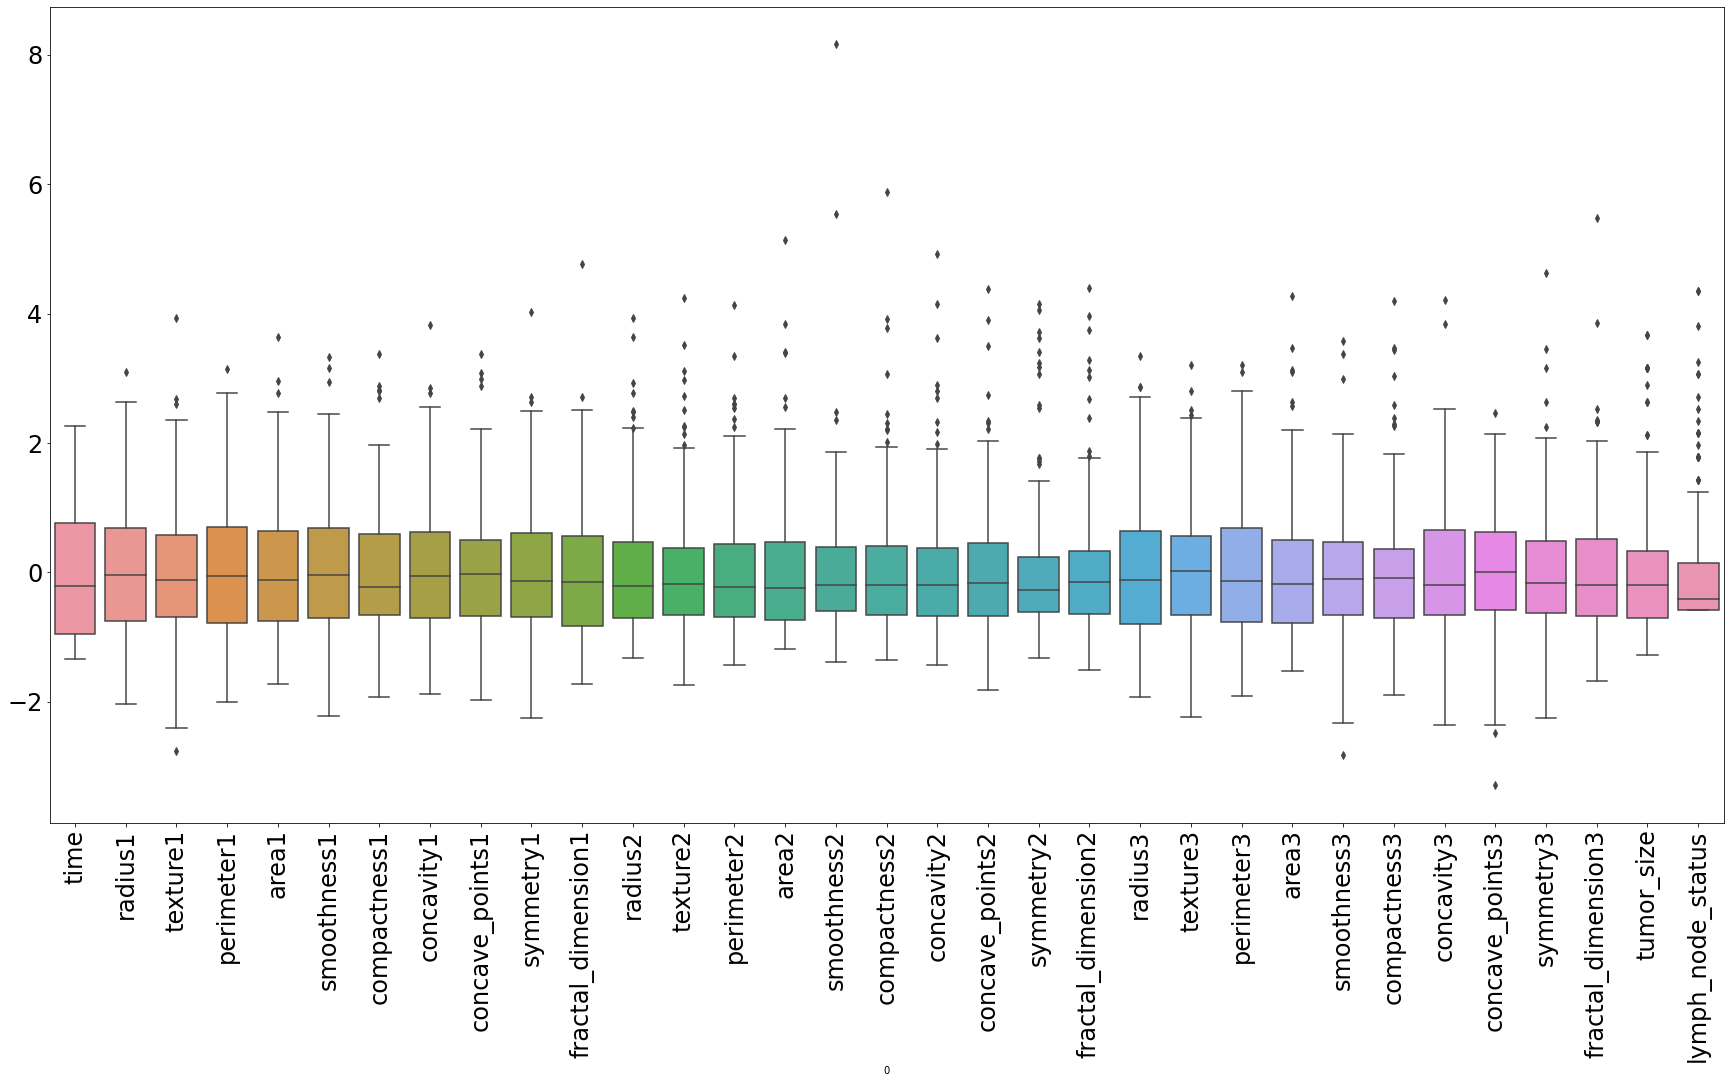

In [16]:
#Standarising the data
mean = np.mean(X, 0)
std = np.std(X, 0)
X = (X - mean) / std

fig, ax = plt.subplots(figsize=(30,15))
boxplot = sns.boxplot(data=X, ax=ax)
plt.yticks(fontsize=24)
plt.xticks(rotation=90, fontsize=24)

We can verify that there are not many outliers outside the whiskers, so probably the distribution of our attributes is a normal distribution
See if the attributes are normally distributed:
We can see that all attributes are aproximatelly normally distributed except for the time that make sense that doesnt follow a normal distribution.

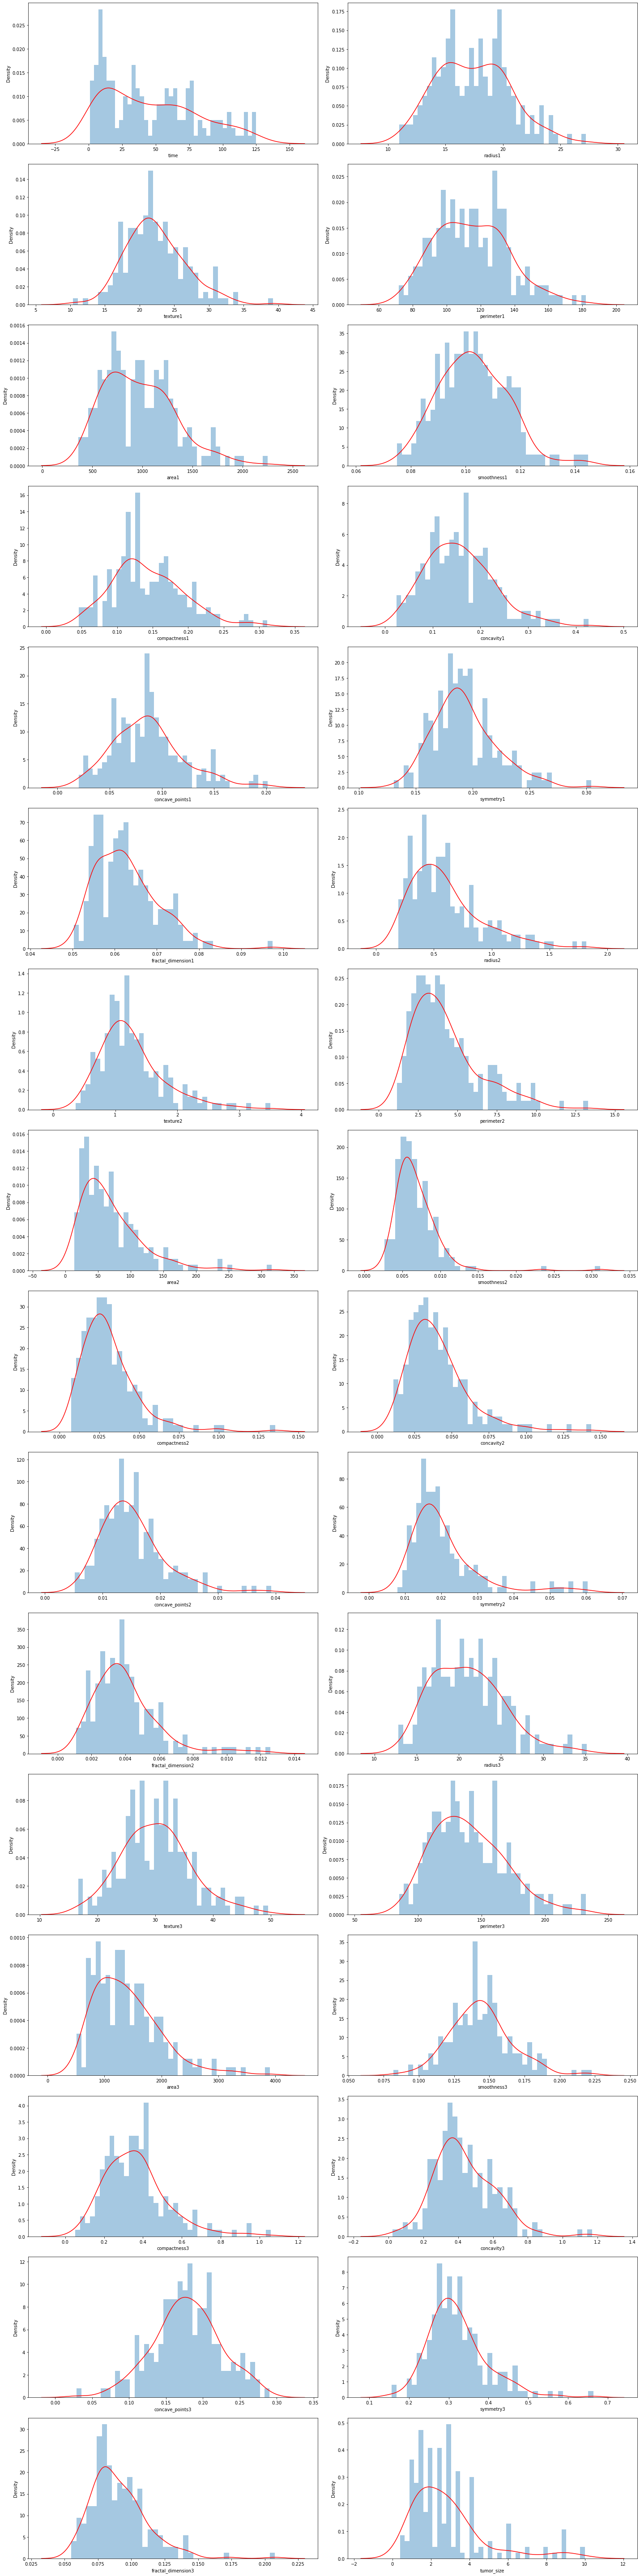

In [17]:
#Attributes standard deviation
attributes = X.columns
data = dataset.iloc[:, 2:]
#if i wanted to do it with stadardized data: data = X

n_rows =attributes.size/2
nbins = 40
 
fig, axes = plt.subplots(int(n_rows), 2, figsize=(20, 80))
axes = axes.ravel()

for col, ax in zip(attributes, axes):
    sns.distplot(data[col], bins=nbins, kde=True, ax=ax, kde_kws={"color":"red"})

fig.tight_layout()
plt.show()


### Correlation of the attributes: correlation matrix

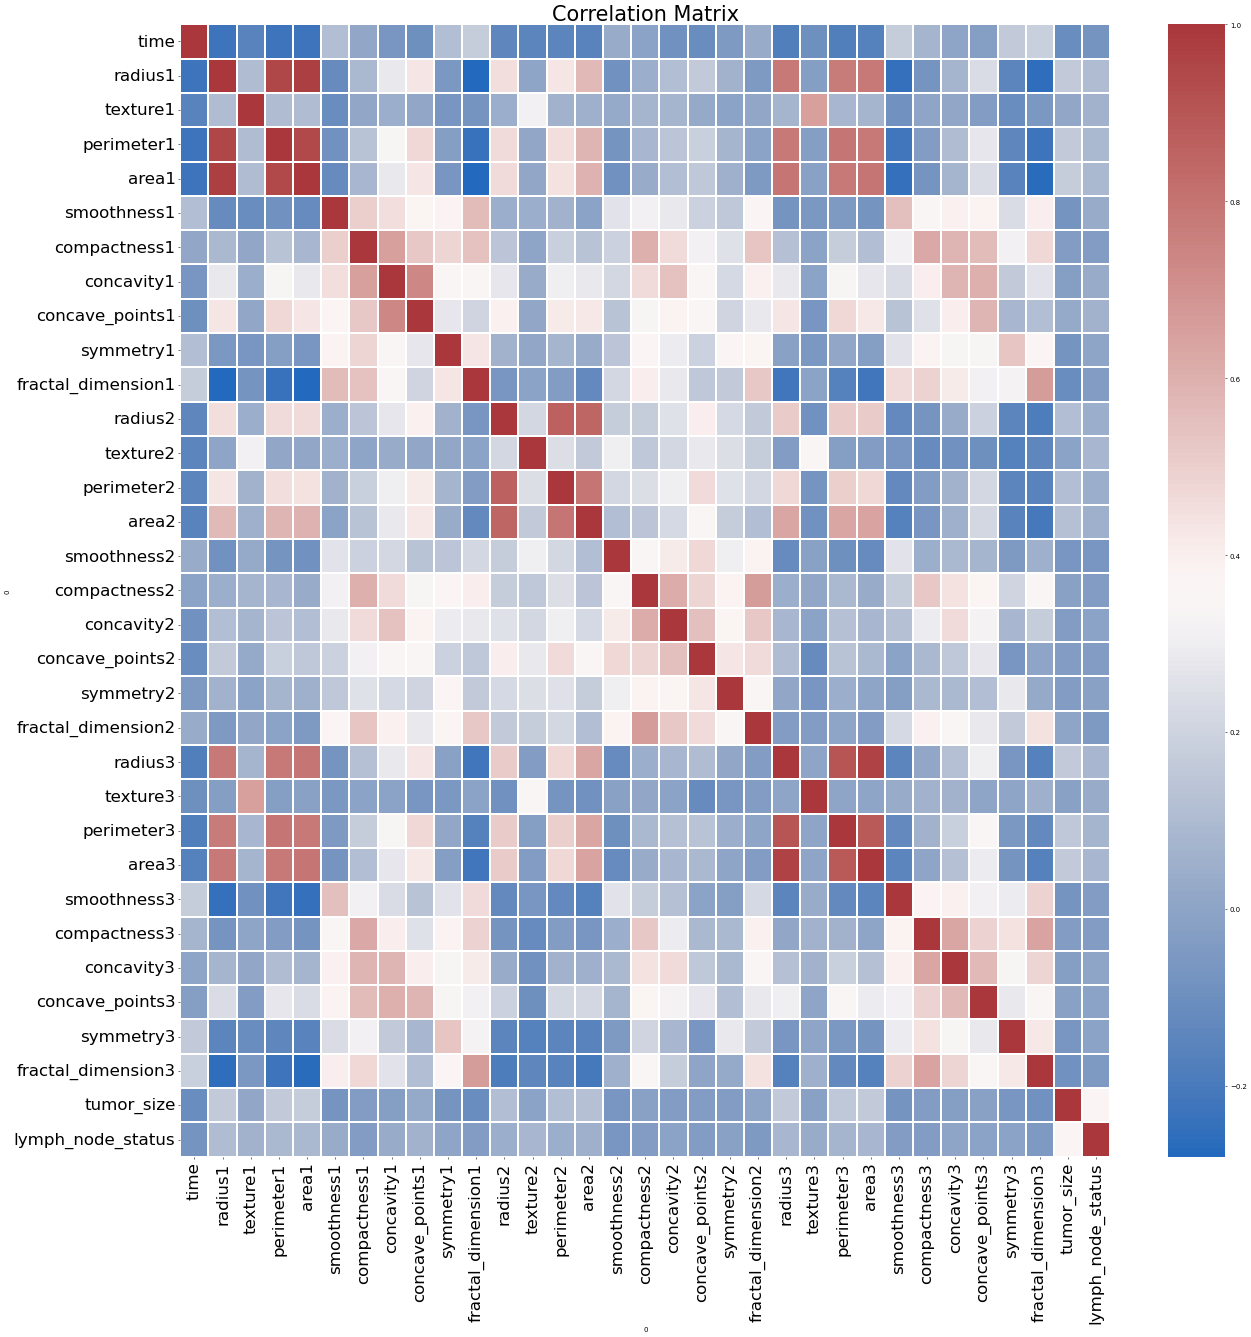

In [18]:
#X_correlation = pd.DataFrame(X)
correlationMatrix = X.corr(method="kendall")
correlationMatrix = correlationMatrix.round(2)

fig, ax = plt.subplots(figsize=(30,30),dpi=50)

heatmap = sns.heatmap(correlationMatrix, annot=False, linewidths=.2, ax=ax, cmap="vlag")
heatmap.set_title("Correlation Matrix", fontsize=30)
heatmap.set_xticklabels(attributes, fontsize = 24)
heatmap.set_yticklabels(attributes,fontsize = 24)

plt.show()

I makes sense that there are more correlation between attributes such as radious, area and perimeter... the radios in different cells are also similar

### Variance explained

In [19]:
dataset = wpbc_data.copy()
X = dataset.iloc[:, 2:] #data columns

#Standarising the data
mean = np.mean(X, 0)
std = np.std(X, 0)
X = (X - mean) / std

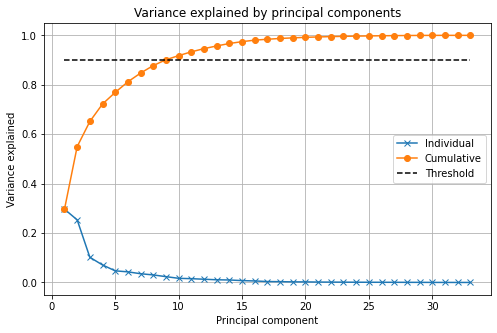

In [20]:
from scipy.linalg import svd

U,S,Vh = svd(X,full_matrices=False)
V = Vh.T

threshold = 0.9
rho = (S*S) / (S*S).sum() 

# Plot variance explained
plt.figure(figsize = (8,5))
plt.plot(range(1,len(rho)+1),rho,'x-')
plt.plot(range(1,len(rho)+1),np.cumsum(rho),'o-')
plt.plot([1,len(rho)],[threshold, threshold],'k--')
plt.title('Variance explained by principal components');
plt.xlabel('Principal component');
plt.ylabel('Variance explained');
plt.legend(['Individual','Cumulative','Threshold'])
plt.grid()
plt.show()

In [22]:
cumulative = np.cumsum(rho)
principal_comp = 0
for s in cumulative:
    principal_comp = principal_comp +1
    if s>threshold:
        print('We need ' + str(principal_comp) + ' PC to be above the threashold')
        print('The cumulative variance explained of those PC is ' + str(s))
        break

We need 9 PC to be above the threashold
The cumulative variance explained of those PC is 0.9012345803037995


### Principal Component Analysis

In [23]:
classLabels = set(y)
classNames = sorted(set(classLabels))
C = len(classNames)

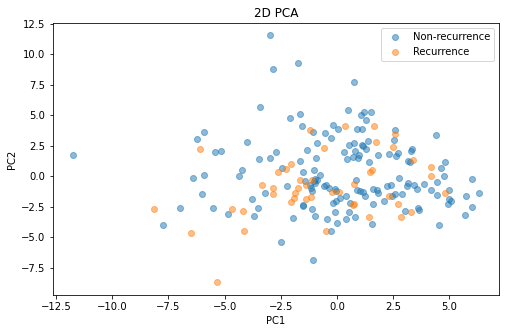

In [27]:
Y = X.values #- np.ones((N,1))* X.values.mean(0)


#y = np.asarray([classDict[value] for value in classLabels])
y = dataset.iloc[:, 1]


# Project the centered data onto principal component space
Z = Y @ V

# Indices of the principal components to be plotted
i = 0
j = 1

# Plot PCA of the data
f = plt.figure(figsize = (8,5))
plt.title('2D PCA')

for c in range(C):
    # select indices belonging to class c:
    class_mask = y==c
    plt.plot(Z[class_mask,i], Z[class_mask,j], 'o', alpha=.5)

plt.legend(['Non-recurrence', 'Recurrence'])
plt.xlabel('PC{0}'.format(i+1))
plt.ylabel('PC{0}'.format(j+1))

# Output result to screen
plt.show()

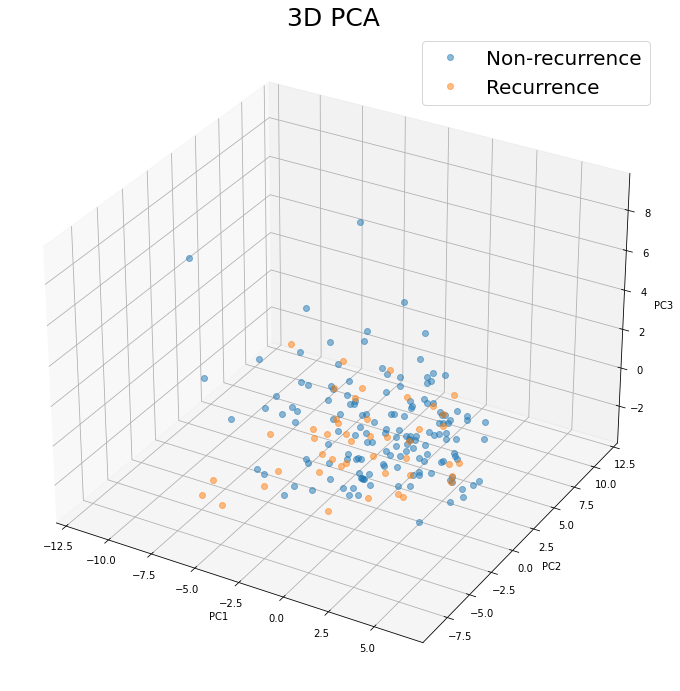

In [32]:
#3D PCA
# Indices of the principal components to be plotted
i = 0
j = 1
k = 2

# Plot PCA of the data
f = plt.figure(figsize=(12,12))
ax = plt.axes(projection='3d')
plt.title('3D PCA', fontsize = 25)

for c in range(C):
    # select indices belonging to class c:
    class_mask = y==c
    plt.plot(Z[class_mask,i], Z[class_mask,j], Z[class_mask,k], 'o', alpha=.5)
    
plt.legend(['Non-recurrence', 'Recurrence'], fontsize=20)
ax.set_xlabel('PC{0}'.format(i+1))
ax.set_ylabel('PC{0}'.format(j+1))
ax.set_zlabel('PC{0}'.format(k+1))

# Output result to screen
plt.show()

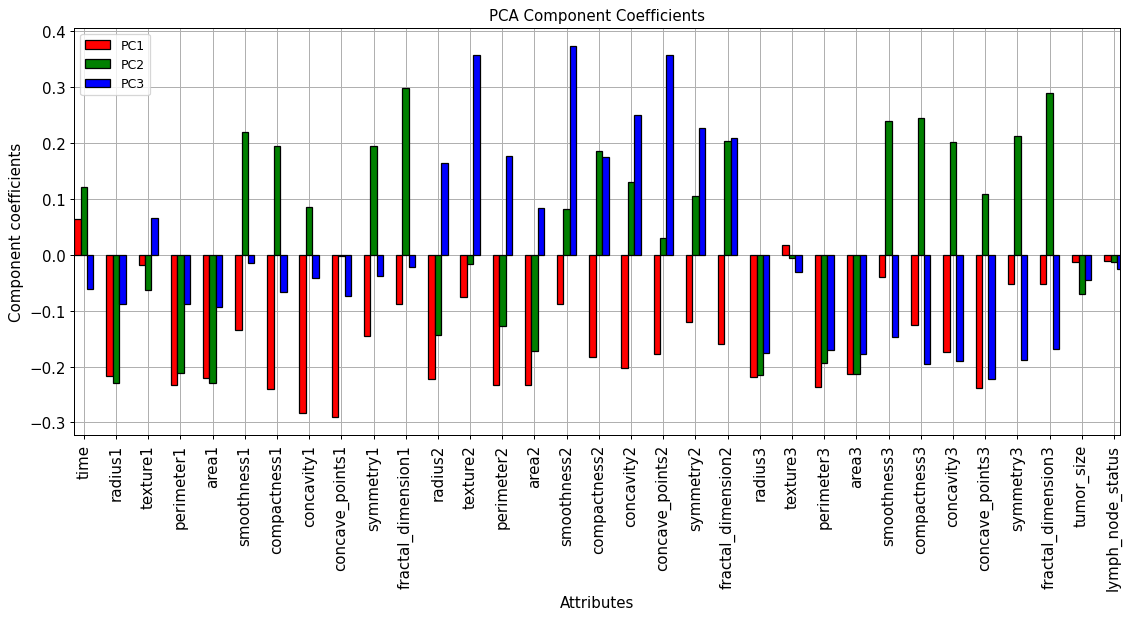

In [41]:
#Component analysis: PCA component coefficients


# Figure size
f = plt.figure(figsize=(15, 6), dpi=90)
plt.rc('axes', axisbelow=True)

pcs = [0,1,2]
legendStrs = ['PC'+str(e+1) for e in pcs]
c = ['r','g','b']
bw = .2
r = np.arange(1,M+1)

plt.rcParams["patch.force_edgecolor"] = True

for i in pcs:    
    plt.bar(r+i*bw, V[:,i], width=bw, color=c[i]) #The columns of V gives us the principal component directions
    plt.xlim(0.9,len(V[:,i])+0.4)
    
plt.xticks(r+bw, attributes, rotation=90, fontsize=12)
plt.yticks(fontsize=12)
plt.xlabel('Attributes', fontsize=12)
plt.ylabel('Component coefficients', fontsize=12)
plt.legend(legendStrs)
plt.grid()
plt.title('PCA Component Coefficients')
plt.show()
